In [32]:
# Initialize Otter
import otter
grader = otter.Notebook("hw01.ipynb")

# HW 1: Math Review and Plotting
## Due Date: Thursday Jan 27, 11:59 PM
## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment

The purpose of this assignment is for you to combine Python, math, and the ideas in Data 8 to draw some interesting conclusions. The methods and results will help build the foundation of Data 100.

## Score Breakdown
Question | Points
--- | --- 
1a | 1
1b | 2
2a | 1 
2b | 1
2c | 2
2d | 2
2e | 1
3a | 2
3b | 2
3c | 1
3d | 2
3e | 2
4a | 1
4b | 1 
4c | 1
4d | 1
5a | 1
5b | 1
5d | 3
6a | 2
6b(i) | 2
6b(ii) | 2
6c | 2
Total | 36

## Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question. 

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells *below* your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when we run the autograder, and it will sometimes cause a failure to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

### Initialize your environment

This cell should run without error if you're using the course Jupyter Hub or you have [set up your personal computer correctly](http://www.ds100.org/sp20/setup).

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Preliminary: Jupyter Shortcuts ###

Here are some useful Jupyter notebook keyboard shortcuts.  To learn more keyboard shortcuts, go to **Help -> Keyboard Shortcuts** in the menu above. 

Here are a few we like:
1. `ctrl`+`return` : *Evaluate the current cell*
1. `shift`+`return`: *Evaluate the current cell and move to the next*
1. `esc` : *command mode* (may need to press before using any of the commands below)
1. `a` : *create a cell above*
1. `b` : *create a cell below*
1. `dd` : *delete a cell*
1. `m` : *convert a cell to markdown*
1. `y` : *convert a cell to code*

### Preliminary: NumPy ###

You should be able to understand the code in the following cells. If not, review the following:

* [The Data 8 Textbook Chapter on NumPy](https://www.inferentialthinking.com/chapters/05/1/Arrays)
* [DS100 NumPy Review](http://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html)
* [Condensed NumPy Review](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [The Official NumPy Tutorial](https://numpy.org/doc/stable/user/quickstart.html)

**Jupyter pro-tip**: Pull up the docs for any function in Jupyter by running a cell with
the function name and a `?` at the end:

In [34]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  

You can close the window at the bottom by pressing `esc` several times or clicking on the x at the right hand side. 

**Another Jupyter pro-tip**: Pull up the docs for any function in Jupyter by typing the function
name, then `<Shift><Tab>` on your keyboard. This is super convenient when you forget the order
of the arguments to a function. You can press `<Tab>` multiple times to expand the docs and reveal additional information.

Try it on the function below:

In [35]:
np.linspace

<function numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)>

### Preliminary: LaTeX ###
You should use LaTeX to format math in your answers. If you aren't familiar with LaTeX, not to worry. It's not hard to use in a Jupyter notebook. Just place your math in between dollar signs within Markdown cells:

`$ f(x) = 2x $` becomes $ f(x) = 2x $.

If you have a longer equation, use double dollar signs to place it on a line by itself:

`$$ \sum_{i=0}^n i^2 $$` becomes:

$$ \sum_{i=0}^n i^2$$


You can align multiple lines using the `&` anchor, `\\` newline, in an `align` block as follows:

```
\begin{align}
f(x) &= (x - 1)^2 \\
&= x^2 - 2x + 1
\end{align}
```
becomes

\begin{align}
f(x) &= (x - 1)^2 \\
&= x^2 - 2x + 1
\end{align}

* [This PDF](latex_tips.pdf) has some handy LaTeX.
* [For more about basic LaTeX formatting, you can read this article.](https://www.sharelatex.com/learn/Mathematical_expressions)


### Preliminary: Sums ###

Here's a recap of some basic algebra written in sigma notation. The facts are all just applications of the ordinary associative and distributive properties of addition and multiplication, written compactly and without the possibly ambiguous "...". But if you are ever unsure of whether you're working correctly with a sum, you can always try writing $\sum_{i=1}^n a_i$ as $a_1 + a_2 + \cdots + a_n$ and see if that helps.

You can use any reasonable notation for the index over which you are summing, just as in Python you can use any reasonable name in `for name in list`. Thus $\sum_{i=1}^n a_i = \sum_{k=1}^n a_k$.

- $\sum_{i=1}^n (a_i + b_i) = \sum_{i=1}^n a_i + \sum_{i=1}^n b_i$
- $\sum_{i=1}^n d = nd$
- $\sum_{i=1}^n (ca_i + d) = c\sum_{i=1}^n a_i + nd$

These properties may be useful in the Least Squares Predictor question. To see the LaTeX we used, double-click this cell. Evaluate the cell to exit.

<!-- BEGIN QUESTION -->

## Question 1: Calculus ##

In this question we will review some fundamental properties of the sigmoid function, which will be discussed when we talk more about logistic regression in the latter half of the class. The sigmoid function is defined to be
$$\sigma(x) = 
\frac{1}{1+e^{-x}}$$

<!--
BEGIN QUESTION
name: q1a
manual: true
-->

### Question 1a ####
Show that $\sigma(-x) = 1 - \sigma(x)$.

**Note, again: In this class, you must always put your answer in the cell that immediately follows the question. DO NOT create any cells between this one and the one that says** _Type your answer here, replacing this text._

$$\sigma(x) = 
\frac{1}{1+e^{-x}}$$
$$\sigma(-x) = 
\frac{1}{1+e^{x}}$$
$$\sigma(x) =  \frac{1}{1+\frac{1}{e^{-x}}} => \frac{1}{1+\frac{1}{e^{-x}}} => \frac{1}{\frac{e^{x}+1}{e^{x}}} => \frac{e^{x}}{e^{x}+1}$$
$$\sigma(-x) =  1 - \frac{e^{x}}{e^{x}+1} => \frac{1}{e^{x}+1}$$
$$\sigma(-x) =  \frac{e^{x}+1}{e^{x}+1} - \frac{e^{x}}{e^{x}+1} = \frac{1}{e^{x}+1}$$
$$\sigma(-x) =  \frac{1}{e^{x}+1} = \frac{1}{e^{x}+1}$$
$$ $$
$$\sigma(-x) = 1 - \sigma(x)$$




<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1b ###
Show that the derivative of the sigmoid function can be written as:

$$\frac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x))$$

[This PDF](latex_tips.pdf) has some handy LaTeX.

<!--
BEGIN QUESTION
name: q1b
manual: true
-->

$$\frac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x))$$
$$\frac{d}{dx}\sigma(x) = \frac{d}{dx}[\frac{1}{1+e^{-x}}] ==> e^{-x}({1+e^{-x}})^{-2} ==> \frac{e^{-x}}{(1+e^{-x})^{2}}$$
$$\sigma(x)(1 - \sigma(x)) ==> \frac{1}{1+e^{-x}}(1-\frac{1}{1+e^{-x}})$$
$$ ==> \frac{1}{1+e^{-x}}(\frac{1+e^{-x}}{1+e^{-x}}-\frac{1}{1+e^{-x}}) ==> \frac{e^{-x}}{(1+e^{-x})^{2}}$$
$$$$
$$\frac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x))$$








<!-- END QUESTION -->



## Question 2: Probabilities and Proportions ##

<!-- BEGIN QUESTION -->

Much of data analysis involves interpreting proportions – lots and lots of related proportions. So let's recall the basics. It might help to start by reviewing [the main rules](https://www.inferentialthinking.com/chapters/09/5/Finding_Probabilities.html) from Data 8, with particular attention to what's being multiplied in the multiplication rule.

<!--
    BEGIN QUESTION
    name: q2a
    manual: true
-->

### Question 2a ###
The Pew Research Foundation publishes the results of numerous surveys, one of which is about the [trust that Americans have](https://www.pewresearch.org/fact-tank/2019/03/22/public-confidence-in-scientists-has-remained-stable-for-decades/) in groups such as the military, scientists, and elected officials to act in the public interest. A table in the article summarizes the results.

Pick one of the options (i) and (ii) to answer the question below; if you pick (i), fill in the blank with the percent. Then, explain your choice.

The percent of surveyed U.S. adults who had a great deal of confidence in both scientists and religious leaders

(i) is equal to ______________________.

(ii) cannot be found with the information in the article.

(ii).  39% and 17% have great deal of condifence in scientists and religious leaders respectively, but there is possiblility of an overlap where it could be the case where people just voted for one of either choices, or both.

<!-- END QUESTION -->

### Question 2b ###
In a famous (or infamous) survey, members of the Harvard medical school were asked to consider a scenario in which "a test to detect a disease whose prevalence is 1/1,000 has a false positive rate of 5 percent". The terminology, the specific question asked in the survey, and the answer, are discussed in detail in a Stat 88 textbook [section](http://stat88.org/textbook/notebooks/Chapter_02/04_Use_and_Interpretation.html#Harvard-Medical-School-Survey) that you are strongly encouraged to read. As Stat 88 is a Data 8 connector course, the section is another look at the same ideas as in the corresponding [Data 8 textbook section](https://www.inferentialthinking.com/chapters/18/2/Making_Decisions.html).

The corresponding tree diagram is copied below for your reference.

<img src="tree_disease_harvard.png">

The survey did not provide the true positive rate. The respondents and Stat 88 were allowed to assume that the true positive rate is 1, but we will not do so here. **Let the true positive rate be some unknown proportion $p$.**

Suppose a person is picked at random from the population. Let $N$ be the event that the person doesn't have the disease and let $T_N$ be the event that the person's test result is negative. 

Fill in Blanks 1 and 2 with options chosen from (1)-(9).

The proportion $P(N \mid T_N)$ is the number of people who $\underline{~~~~~~1~~~~~~}$ relative to the total number of people who $\underline{~~~~~~2~~~~~~}$.

(1) are in the population

(2) have the disease

(3) don't have the disease

(4) test positive

(5) test negative

(6) have the disease and test positive

(7) have the disease and test negative

(8) don't have the disease and test positive

(9) don't have the disease and test negative

Assign the variable `q4bi` to your answer to the first blank and `q4bii` to your answer to the second blank.

<!--
    BEGIN QUESTION
    name: q2b
    points: 1
-->

In [36]:
q4bi = 9
q4bii = 5
q4bi, q4bii

(9, 5)

In [37]:
grader.check("q2b")

q2b results: All test cases passed!

### Question 2c ###
(This is a continuation of the previous part.) Define a function `no_disease_given_negative` that takes $p$ as its argument and returns $P(N \mid T_N)$.

<!--
    BEGIN QUESTION
    name: q4c
    points: 2
-->

In [38]:
def no_disease_given_negative(p):
    return (.999 * .95)/(.001 * (1-p) + .999 * .95)

In [39]:
grader.check("q4c")

q4c results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 2d ###
(This part is a continuation of the previous two.) Pick all of the options (i)-(iv) that are true for all values of $p$. Explain by algebraic or probailistic reasoning; you are welcome to use your function `no_disease_given_negative` to try a few cases numerically. Your explanation should include the reasons why you *didn't* choose some options.

$P(N \mid T_N)$ is

(i) equal to $0.95$.

(ii) equal to $0.999 \times 0.95$.

(iii) greater than $0.999 \times 0.95$.

(iv) greater than $0.95$.

<!--
BEGIN QUESTION
name: q2d
manual: true
-->

(iii) and (iv) are correct.  Below, we plugged in the lowest and highest values of p possible (0 and 1) into our function to get the range of possible values of P(N |T).  This range of values was greater 0.999*.95 and .95, so this proves these two choices correct. (i) and (ii) are not correct.  The probability will change when p changes, so we know for sure that all values of p won't be equal to one single value, such as in these two choices.

<!-- END QUESTION -->

In [40]:
a = no_disease_given_negative(0)
b = no_disease_given_negative(1)
print(a)
print(b)
print (.999*.95)

0.998947423819799
1.0
0.94905


<!-- BEGIN QUESTION -->

### Question 2e ###
Suzuki is one of most commonly owned makes of cars in our county (Alameda). A car heading from Berkeley to San Francisco is pulled over on the freeway for speeding. Suppose I tell you that the car is either a Suzuki or a Lamborghini, and you have to guess which of the two is more likely. 

What would you guess, and why? Make some reasonable assumptions and explain them (data scientists often have to do this), justify your answer, and say how it's connected to the previous parts.

<!--
    BEGIN QUESTION
    name: q2e
    manual: true
-->

Most likely a Suzuki, since it is stated that this car brand is more common in the county of Alamdeda.  Since lambos are rare as they are expensive, luxury cars, compared to Suzuki's theres a higher probability that a Suzuki is pulled over.  This is related to the previous parts as people are much more likely to not have the disease than to have the disease.  Same case here, where the random selection of a car is much more likely to be a Suzuki than a lambo.

<!-- END QUESTION -->



## Question 3: Distributions ##

Visualizing distributions, both categorical and numerical, helps us understand variability. In Data 8 you visualized numerical distributions by drawing [histograms](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html#A-Histogram), which look like bar charts but represent proportions by the *areas* of the bars instead of the heights or lengths. In this exercise you will use the `hist` function in `matplotlib` instead of the corresponding `Table` method to draw histograms.

To start off, suppose we want to plot the probability distribution of the number of spots on a single roll of a die. That should be a flat histogram since the chance of each of the values 1 through 6 is 1/6. Here is a first attempt at drawing the histogram.

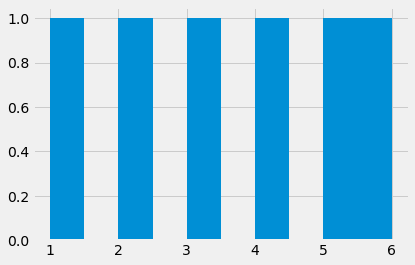

In [41]:
faces = range(1, 7)
plt.hist(faces);

This default plot is not helpful. We have to choose some arguments to get a visualization that we can interpret. 

Note that the second printed line shows the left ends of the default bins, as well as the right end of the last bin. The first line shows the counts in the bins. If you don't want the printed lines you can add a semi-colon at the end of the call to `plt.hist`, but we'll keep the lines for now.

Let's redraw the histogram with bins of unit length centered at the possible values. By the end of the exercise you'll see a reason for centering. Notice that the argument for specifying bins is the same as the one for the `Table` method `hist`.

(array([1., 1., 1., 1., 1., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

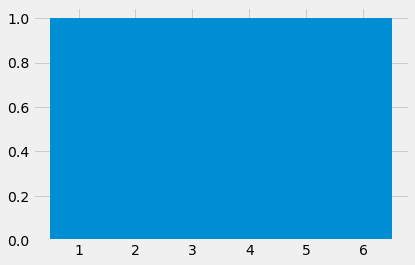

In [42]:
unit_bins = np.arange(0.5, 6.6)
plt.hist(faces, bins = unit_bins)

We need to see the edges of the bars! Let's specify the edge color `ec` to be white. [Here](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) are all the colors you could use, but do try to drag yourself away from the poetic names.

(array([1., 1., 1., 1., 1., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

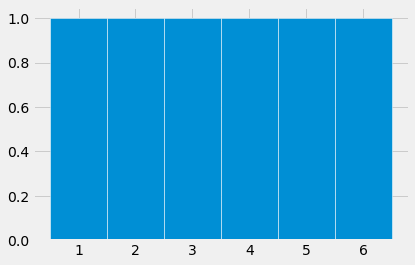

In [43]:
plt.hist(faces, bins = unit_bins, ec='white')

That's much better, but look at the vertical axis. It is not drawn to the [density scale](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html#The-Histogram:-General-Principles-and-Calculation) defined in Data 8. We want a histogram of a probability distribution, so the total area should be 1. We just have to ask for that.

(array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

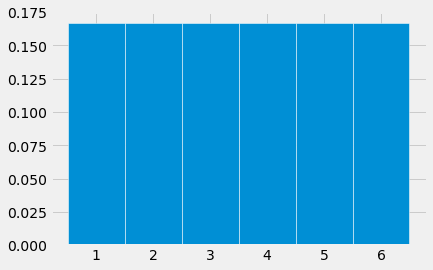

In [44]:
plt.hist(faces, bins = unit_bins, ec='white', density=True)

That's the probability histogram of the number of spots on one roll of a die. The proportion is $1/6$ in each of the bins.

**Note**: You may notice that running the above cells also displayed the return value of the last function call of each cell. This was intentional on our part to show you how `plt.hist()` ([documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) returned different values per plot.

**Note 2**: Going forward, you can use a semicolon `;` on the last line to suppress additional display, as below.

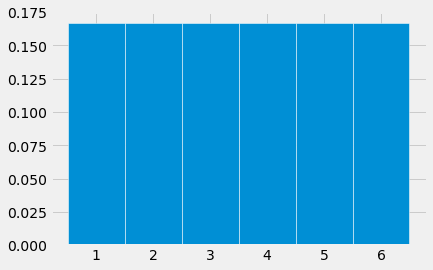

In [45]:
plt.hist(faces, bins = unit_bins, ec='white', density=True);

<!-- BEGIN QUESTION -->

### Question 3a ###

Define a function `integer_distribution` that takes an array of integers and draws the histogram of the distribution using unit bins centered at the integers and white edges for the bars. The histogram should be drawn to the density scale. The left-most bar should be centered at the smallest integer in the array, and the right-most bar at the largest.

Your function does not have to check that the input is an array consisting only of integers. The display does not need to include the printed proportions and bins.

If you have trouble defining the function, go back and carefully read all the lines of code that resulted in the probability histogram of the number of spots on one roll of a die. Pay special attention to the bins. 

<!--
    BEGIN QUESTION
    name: q3a
    manual: true
-->

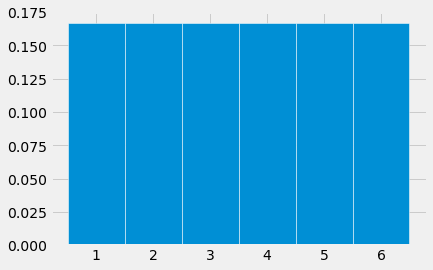

In [46]:
def integer_distribution(x):
    x_bins = np.arange(min(x) - 0.5, max(x) + .6)
    plt.hist(x, bins = x_bins, ec='white', density=True)
integer_distribution(faces)

<!-- END QUESTION -->

### Question 3b ###
(Note: You can complete this part with just prerequisite knowledge for Data 100. That being said, Lecture 2 provides additional historical context and definitions for probability sample, sampling bias, and chance error).

One way to use probability samples is to quantify sampling bias and chance error. Put briefly, if we assume that a sample distribution was selected at random from a known population, then we can quantify how likely that sample is to have arisen due to random chance (**chance error**). If the difference in sample and population distributions is too great, then we suspect that the given sample has **bias** in how it was selected from the population.

Let's see this process in a *post*-analysis of *pre*-election polling of the 1936 U.S. Presidential Election. Through the U.S. electoral college process (we'll ignore it in this question, but read more [here](https://en.wikipedia.org/wiki/United_States_Electoral_College)), Franklin D. Roosevelt won the election by an overwhelming margin. The popular vote results were approximately 61% Roosevelt (Democrat, incumbent), 37% Alf Landon (Republican), and 2% other candidates. For this problem, this is our **population distribution**. 

You can use `np.random.multinomial` to simulate drawing at random with replacement from a categorical distribution. The arguments are the sample size `n` and an array `pvals` of the proportions in all the categories. The function simulates `n` independent random draws from the distribution and returns the observed counts in all the categories. Read the documentation to see how this is described formally; we will use the formal terminology and notation in future assignments after we have discussed them in class.

You will see that the function also takes a third argument `size`, which for our purposes will be an integer that specifies the number of times to run the entire simulation. All the runs are independent of each other. 

Write one line of code that uses `np.random.multinomial` to run 10 independent simulations of drawing 100 times at random with replacement from a population in which 61% of the people vote for Roosevelt, 37% for Landon, and 2% for other candidatdes. The output should be an array containing the counts in the **Roosevelt** category in the 10 simulations. It will help to recall how to slice `NumPy` arrays. Assign your answer to the variable `sample`.

<!--
    BEGIN QUESTION
    name: q3b
    points: 2
-->

In [47]:
sample = np.random.multinomial(100,[.61,.37,.02],size = 10) 
new = sample[:10, :1]
sample = new
sample

array([[60],
       [55],
       [53],
       [67],
       [60],
       [67],
       [54],
       [54],
       [62],
       [58]])

In [48]:
grader.check("q3b")

q3b results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 3c ###

Replace the "..." in the code cell below with a Python expression so that the output of the cell is an empirical histogram of 500,000 simulated counts of voters for Roosevelt in 100 draws made at random with replacement from the voting population.  

After you have drawn the histogram, you might want to take a moment to recall the conclusion reached by the *Literary Digest*, a magazine that---while having successfully predicted the outcome of many previous presidential elections---failed to correctly predict the winner of the 1936 presidential election. In their survey of 10 million individuals, they predicted the popular vote as just 43% for Roosevelt and 57% for Landon. Based on our simulation, there was most definitely sampling bias in the *Digest*'s sampling process.

<!--
    BEGIN QUESTION
    name: q3c
    manual: true
-->

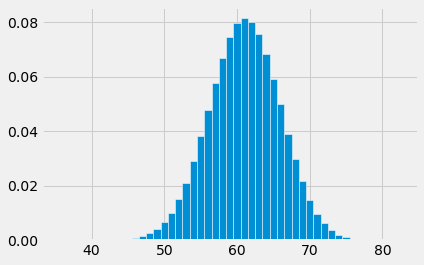

In [49]:
simulated_counts = np.random.multinomial(100,[.61,.37,.02],size = 500000)[:, :1] 
integer_distribution(simulated_counts)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3d ###
As you know, the count of Roosevelt voters in a sample of 100 people drawn at random from the eligible population is expected to be 61. Just by looking at the histogram in Part **c**, and **no other calculation**, pick the correct option and **explain your choice**. You might want to refer to the [Data 8 textbook](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html) again.

The SD of the distribution of the number of Roosevelt voters in a random sample of 100 people drawn from the eligible population is closest to

(i) 1.9

(ii) 4.9

(iii) 10.9

(iv) 15.9

<!--
    BEGIN QUESTION
    name: q3d
    manual: true
-->

(ii).  The range of values spans from 45 to 75, and it takes 3SDs from the center to the left and right ends to cover almost 100% of the data.  Since the center is about 60, we take the right end and subtract by 75 to get 15.  15/3 SDs is 5, so our SD is around 5.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3e ###
The *normal curve with mean $\mu$ and SD $\sigma$* is defined by

$$
f(x) ~ = ~ \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}, ~~~ -\infty < x < \infty
$$

Redraw your histogram from Part **c** and overlay the normal curve with $\mu = 61$ and $\sigma$ equal to the choice you made in Part **d**. You just have to call `plt.plot` after `integer_distribution`. Use `np.e` for $e$. For the curve, use 2 as the line width, and any color that is easy to see over the blue histogram. It's fine to just let Python use its default color.

Now you can see why centering the histogram bars over the integers was a good idea. The normal curve peaks at 26, which is the center of the corresponding bar.

<!--
    BEGIN QUESTION
    name: q3e
    manual: true
-->

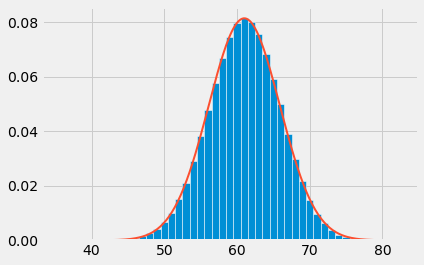

In [50]:
mu = 61
sigma = 4.9
x = np.linspace(40, 80, 200)
f_x = (1/(np.sqrt(2*np.pi)*sigma)*(np.e**((-1/2)*(((x-mu)/sigma)**2))))
integer_distribution(simulated_counts)
plt.plot(x, f_x, linewidth = 2);

<!-- END QUESTION -->



## Question 4: Linear Algebra ##
A common representation of data uses matrices and vectors, so it is helpful to familiarize ourselves with linear algebra notation, as well as some simple operations.

Define a vector $\vec{v}$ to be a column vector. Then, the following properties hold:

* $c\vec{v}$ with $c$ some constant $c \in \mathbb{R}$, is equal to a new vector where every element in $c\vec{v}$ is equal to the corresponding element in $\vec{v}$ multiplied by $c$. For example, $2 \begin{bmatrix}
     1 \\
     2 \\
\end{bmatrix} = \begin{bmatrix}
     2 \\
     4 \\
\end{bmatrix}$

* $\vec{v}_1 + \vec{v}_2$ is equal to a new vector with elements equal to the elementwise addition of $\vec{v}_1$ and $\vec{v}_2$. For example, $\begin{bmatrix}
     1 \\
     2 \\
\end{bmatrix} + \begin{bmatrix}
     -3 \\
     4 \\
\end{bmatrix} = \begin{bmatrix}
    -2 \\
     6 \\
\end{bmatrix}$.

The above properties form our definition for a **linear combination** of vectors. $\vec{v}_3$ is a linear combination of $\vec{v}_1$ and $\vec{v}_2$ if $\vec{v}_3 = a\vec{v}_1 + b\vec{v}_2$, where $a$ and $b$ are some constants.

Oftentimes, we stack column vectors to form a matrix. Define the **rank** of a matrix $A$ to be equal to the maximal number of linearly independent columns in $A$. A set of columns is **linearly independent** if no column can be written as a linear combination of any other column(s) within the set.

For example, let $A$ be a matrix with 4 columns. If three of these columns are linearly independent, but the fourth can be written as a linear combination of the other three, then $\text{rank}(A) = 3$.

<!-- BEGIN QUESTION -->

**For each part below**, you will be presented with a set of vectors, and a matrix consisting of those vectors stacked in columns.
1. State the rank of the matrix, and whether or not the matrix is full rank.
1. If the matrix is *not* full rank, state a linear relationship among the vectors—for example: $\vec{v}_1 = 2\vec{v}_2$.

<!--
BEGIN QUESTION
name: q4a
manual: true
-->

### Question 4a ###

$$
\vec{v}_1 = \begin{bmatrix}
     1 \\
     0 \\
\end{bmatrix}
, 
\vec{v}_2 = \begin{bmatrix}
     1 \\
     1 \\
\end{bmatrix}
, A = \begin{bmatrix}
    \vert & \vert \\
    \vec{v}_1 & \vec{v}_2   \\
    \vert & \vert
\end{bmatrix}$$


Rank = 2, Full rank.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4b
manual: true
-->

### Question 4b ###
$$
\vec{v}_1 = \begin{bmatrix}
     3 \\
     -4 \\
\end{bmatrix}
,
\vec{v}_2 = \begin{bmatrix}
     0 \\
     0 \\
\end{bmatrix}
,
B = \begin{bmatrix}
    \vert & \vert \\
    \vec{v}_1 & \vec{v}_2   \\
    \vert & \vert
\end{bmatrix}
$$


Rank = 1, $\vec{v}_2 = 0\vec{v}_1$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4c
manual: true
-->

### Question 4c ###
$$
\vec{v}_1 = \begin{bmatrix}
     0 \\
     1 \\
\end{bmatrix}
,
\vec{v}_2 = \begin{bmatrix}
     5 \\
    0 \\
\end{bmatrix}
,
\vec{v}_3 = \begin{bmatrix}
     10 \\
     10 \\
\end{bmatrix}
,
C = \begin{bmatrix}
    \vert & \vert & \vert \\
    \vec{v}_1 & \vec{v}_2 & \vec{v}_3    \\
    \vert & \vert & \vert
\end{bmatrix}
$$


Rank = 2, $10\vec{v}_1 + 2\vec{v}_2 = \vec{v}_3$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4d
manual: true
-->

### Question 4d ###
$$
\vec{v}_1 = \begin{bmatrix}
     0 \\
     2 \\
     3 \\
\end{bmatrix}
, 
\vec{v}_2 = \begin{bmatrix}
     -2 \\
    -2 \\
     5 \\
\end{bmatrix}
,
\vec{v}_3 = \begin{bmatrix}
     2 \\
     4 \\
     -2 \\
\end{bmatrix}
,
D = \begin{bmatrix}
    \vert & \vert & \vert \\
    \vec{v}_1 & \vec{v}_2 & \vec{v}_3    \\
    \vert & \vert & \vert
\end{bmatrix}
$$


Rank = 2, $\vec{v}_1 - \vec{v}_3 = \vec{v}_2$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 5: A Least Squares Predictor ##
Let the list of numbers $(x_1, x_2, \ldots, x_n)$ be data. You can think of each index $i$ as the label of a household, and the entry $x_i$ as the annual income of Household $i$. Define the **mean** or **average** $\mu$ of the list to be
$$\mu ~ = ~ \frac{1}{n}\sum_{i=1}^n x_i.$$

<!--
BEGIN QUESTION
name: q5a
manual: true
-->

### Question 5a ###
The $i$th *deviation from average* is the difference $x_i - \mu$. In Data 8 you saw in numerical examples that the [sum of all these deviations is 0](https://www.inferentialthinking.com/chapters/14/2/Variability.html#The-Rough-Size-of-Deviations-from-Average). Now prove that fact. That is, show that $\sum_{i=1}^n (x_i - \mu) = 0$.


$\sum_{i=1}^n(x_i - \mu) = \sum_{i=1}^nx_i - \sum_{i=1}^n\mu = 0 \\\sum_{i=1}^nx_i = \sum_{i=1}^n\mu \\\sum_{i=1}^nx_i = n\mu = 
$$ n\frac{1}{n}\sum_{i=1}^n x_i.$$
$
$=\sum_{i=1}^nx_i$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 5b ###
[Recall](https://www.inferentialthinking.com/chapters/14/2/Variability.html#The-Rough-Size-of-Deviations-from-Average) that the **variance** of a list is defined as the *mean squared deviation from average*, and that the [**standard deviation**](https://www.inferentialthinking.com/chapters/14/2/Variability.html#Standard-Deviation) (SD) of the list is the square root of the variance. The SD is in the same units as the data and measures the rough size of the deviations from average.

Denote the variance of the list by $\sigma^2$. Write a math expression for $\sigma^2$ in terms of the data ($x_{1} \dots x_{n}$) and $\mu$. We recommend building your expression by reading the definition of variance from right to left. That is, start by writing the notation for "average", then "deviation from average", and so on.


<!--
BEGIN QUESTION
name: q5b
manual: true
-->

$\sigma^2 = \frac{\sum_{i=1}^n(x_i - \mu)^2}{n}$

<!-- END QUESTION -->



### Mean Squared Error
Suppose you have to predict the value of $x_i$ for some $i$, but you don't get to see $i$ and you certainly don't get to see $x_i$. You decide that whatever $x_i$ is, you're just going to use some number $c$ as your *predictor*.

The *error* in your prediction is $x_i - c$. Thus the **mean squared error** (MSE) of your predictor $c$ over the entire list of $n$ data points can be written as:

$$MSE(c) = \frac{1}{n}\sum_{i=1}^n (x_i - c)^2.$$

You may already see some similarities to your definition of variance from above! You then start to wonder—if you picked your favorite number $c = \mu$ as the predictor, would it be "better" than other choices $c \neq \mu$?

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5c
manual: true
-->

### Question 5c
One common approach to defining a "best" predictor is as predictor that *minimizes* the MSE on the data $(x_1, \dots, x_n)$.

In this course, we commonly use calculus to find the predictor $c$ as follows:
1. Define $MSE$ to be a function of $c$, i.e., $MSE(c)$ as above. Assume that the data points $x_1, x_2, ..., x_n$ are fixed, and that $c$ is the only variable. 
2. Determine the value of $c$ that minimizes $MSE(c)$.
3. Justify that this is indeed a minimum, not a maximum.

Step 1 is done for you in the problem statement; follow steps 2 and 3 to show that $\mu$ is the value of $c$ that minimizes $MSE(c)$. You must do both steps.

To find the value that minimizes the MSE, we will find the derivative of the equation and find the value of c that makes it equal to 0.
_$\frac{d}{dx}\frac{1}{n}\sum_{i=1}^n(x_i - c)^2 = \frac{2}{n}\sum_{i=1}^n(x_i - cn)
\\\frac{2}{n}(\sum_{i=1}^nx_i - cn) = 2(\frac{\sum_{i=1}^nx_i}{n}-c)$
We know what the mean is as stated at the beginning of Q5.
$\\\frac{\sum{i=1}^n}{n} = \mu, c = \mu$ makes the derivative 0
$\\\frac{d}{dx}\frac{2}{n}(\sum_{i=1}^nx_i - cn) = 2$
Since the second derivative is positive, it is concave up indicating that $c = \mu $ is a minimum.

<!-- END QUESTION -->



Your proof above shows that $\mu$ is the **least squares** *constant* predictor.

## Question 6: A More Familiar Least Squares Predictor
In Data 8 you found (numerically) the [least squares *linear* predictor](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html) of a variable $y$ based on a related variable $x$. In this course, we will prove your findings using a generalization of your calculation in the previous question.

When we get to this proof later in this course, you will need to be comfortable with vector operations. For now, you will get familiar with this notation by rewriting your least squares findings from Data 8 (and the previous question) using vector notation. **This question won't require you to write LaTeX**, so just focus on the mathematical notation we're presenting.

### The Dot Product
(1) We start by defining the **dot product** of two *real* vectors
$x = \begin{bmatrix}
     x_1 \\
     x_2 \\
     \dots \\
     x_n
     \end{bmatrix}$
and 
$y = \begin{bmatrix}
     y_1 \\
     y_2 \\
     \dots \\
     y_n
\end{bmatrix}$ as follows:

$$x^T y = \sum_{i=1}^n x_i y_i $$
* Given the above definition, the dot product is (1) a **scalar**, not another vector; and (2) only defined for two vectors of the same length.
* **Note**: In this course we often opt for $x$ instead of $\vec{x}$ to simplify notation; $x$ as a vector is inferred from its use in the dot product. Then $x_i$ is the $i$-th element of the vector $x$.
* *Detail*: In this course, we prefer the notation $x^Ty$ to illustrate a dot product, defined as matrix multiplication of $x^T$ and $y$. In the literature you may also see $x \cdot y$, but we avoid this notation since the dot ($\cdot$) notation is occasionally used for scalar values.
* *Detail*: The dot product is a special case of an inner product, where $x, y \in \mathbb{R}^n$.

(2) We introduce a special vector, $\mathbb{1}$, to write the [**mean**](https://inferentialthinking.com/chapters/14/1/Properties_of_the_Mean.html) $\bar{x}$ of data $(x_1, x_2, \dots, x_n)$ as a dot product:
\begin{align}
\bar{x} &= \frac{1}{n}\sum_{i=1}^n x_i = \frac{1}{n}\sum_{i=1}^n 1x_i \\
        &= \frac{1}{n}(x^T\mathbb{1}).
\end{align}
* The data $(x_1, \dots, x_n)$ have been defined as an $n$-dimensional column vector $x$, where $x = \begin{bmatrix}
     x_1 \\
     x_2 \\
     \dots \\
     x_n
     \end{bmatrix}$.
* The special vector $\mathbb{1}$ is a **vector of ones**, whose length is defined by the vector operation in which it is used. So with $n$-dimensional column vector $x$, the dot product $x^T\mathbb{1}$ implies that $\mathbb{1}$ is an $n$-dimensional column vector where every element is $1$.
* Because dot products produce scalars, the multiplication of two scalars $\frac{1}{n}$ and $x^T\mathbb{1}$ produces another scalar, $\bar{x}$.
* **Note**: We use bar notation for the mean ($\bar{x}$ instead of $\mu$) in this problem to differentiate $\bar{x}$ from $\bar{y}$, the latter of which is the mean of data $(y_1, \dots, y_n)$.

(3) We can further use this definition of $\bar{x}$ to additionally write the [**variance**](https://www.inferentialthinking.com/chapters/14/2/Variability.html#The-Rough-Size-of-Deviations-from-Average) $\sigma_x^2$ of the data $(x_1, \dots, x_n)$ as a dot product. Verify for yourself that the below operation defines $\sigma_x^2$ as a scalar:
\begin{align}
\sigma_x^2 &= \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2 \\
        &= \frac{1}{n}(x - \bar{x})^T(x - \bar{x}).
\end{align}

<!--
BEGIN QUESTION
name: q6a
manual: false
-->

### Question 6a ###

To verify your understanding of the dot product as defined above, suppose you are working with $n$ datapoints $\{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}$.
* Define the $x$ data as $(x_1, \dots, x_n)$ and the $y$ data as $(y_1, \dots, y_n)$, and define $x$ and $y$ as two $n$-dimensional column vectors, where the $i$-th elements of $x$ and $y$ are $x_i$ and $y_i$, respectively.
* Define $\bar{x}$ and $\bar{y}$ as the means of the $x$ data and $y$ data, respectively.
* Define $\sigma_x^2$ and $\sigma_y^2$ as the variances of the $x$ data and $y$ data, respectively. Therefore $\sigma_x = \sqrt{\sigma_x^2}$ and $\sigma_y = \sqrt{\sigma_y^2}$ are the [**standard deviations**](https://inferentialthinking.com/chapters/14/2/Variability.html?highlight=standard%20deviation#standard-deviation) of the $x$ data and $y$ data, respectively.

**Suppose** $n = 32$. What is the **dimension** of each of the following expressions? 

Expression (i). Note there are two ways it is written in the literature.
$$\dfrac{1}{\sigma_x} (x - \bar{x}) = \dfrac{x - \bar{x}}{\sigma_x} $$

Expression (ii).
$$\dfrac{1}{n} \left( \dfrac{x - \bar{x}}{\sigma^x}\right)^T \left( \dfrac{x - \bar{x}}{\sigma^x}\right)$$

Assign the variables `q6a_i` and `q6a_ii` to an integer representing the dimension of the above expressions (i) and (ii), respectively.

In [51]:
q6a_i = 32
q6a_ii = 1

# do not modify these lines
print(f"Q6a(i) is {q6a_i}-dimensional")
print(f"Q6a(ii) is {q6a_ii}-dimensional")

Q6a(i) is 32-dimensional
Q6a(ii) is 1-dimensional


In [52]:
grader.check("q6a")

q6a results: All test cases passed!

### Dot Products in NumPy

Next, we'll use NumPy's matrix multiplication operators to compute expressions for the **regression line**, which you learned in Data 8 was the unique line that minimizes the mean squared error of estimation among all straight lines. At this time, it may be helpful to review the [Data 8 section](https://inferentialthinking.com/chapters/15/2/Regression_Line.html#the-equation-of-the-regression-line).

Before we continue, let's contextualize our computation by loading in a [dataset](https://inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html) you saw in Data 8: the relation between weight lifted and shot put distance among surveyed female collegiate athletes. We've plotted the point using matplotlib's [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function, which you will see in more detail in two weeks.

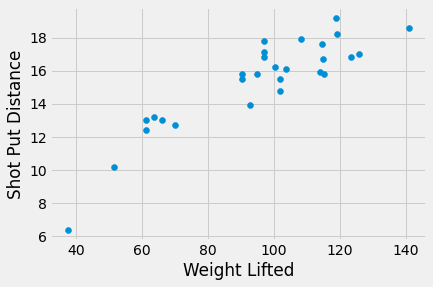

In [53]:
# Run this cell to plot the data.
weight_lifted = np.array([ 37.5,  51.5,  61.3,  61.3,  63.6,  66.1,  70. ,  92.7,  90.5,
        90.5,  94.8,  97. ,  97. ,  97. , 102. , 102. , 103.6, 100.4,
       108.4, 114. , 115.3, 114.9, 114.7, 123.6, 125.8, 119.1, 118.9,
       141.1])
shot_put_distance = np.array([ 6.4, 10.2, 12.4, 13. , 13.2, 13. , 12.7, 13.9, 15.5, 15.8, 15.8,
       16.8, 17.1, 17.8, 14.8, 15.5, 16.1, 16.2, 17.9, 15.9, 15.8, 16.7,
       17.6, 16.8, 17. , 18.2, 19.2, 18.6])

plt.scatter(weight_lifted, shot_put_distance)
plt.xlabel("Weight Lifted")
plt.ylabel("Shot Put Distance");

Looks pretty linear! Let's try to fit a regression line to this data.

Define the vectors $x$ as the weight lifted data vector and $y$ as the shot put distance data vector, respectively, of the college athletes. Then the regression line uses the weight lifted $x$ to predict $\hat{y}$, which is the **linear estimate** of the actual value shot put distance $y$ as follows:

\begin{align}
\hat{y} &= \hat{a} + \hat{b}{x}\text{, where} \\
\hat{a} &= \bar{y} - \hat{b}\bar{x} \\
\hat{b} &= r \dfrac{\sigma_y}{\sigma_x}
\end{align}

* $\bar{x}, \bar{y}$ and $\sigma_x, \sigma_y$ are the means and standard deviations, respectively of the data $x$ and $y$, respectively. Here, $r$ is the correlation coefficient as defined in Data 8! 
* **Note**: We use the hat $\hat{}$ notation to indicate values we are *estimating*: $\hat{y}$, the predicted shot put distance, as well as $\hat{a}$ and $\hat{b}$, the respective estimated intercept and slope parameters we are using to model the "best" linear predictor of $y$ from $x$. We'll dive into this later in the course.
* **Note**: Remember how we dropped the $\vec{}$ vector notation? These linear regression equations therefore represent both the scalar case (predict a single value $\hat{y}$ from a single $x$) *and* the vector case (predict a vector $\hat{y}$ element-wise from a vector $x$). How convenient!!

In this part, instead of using NumPy's built-in statistical functions like `np.mean()` and `np.std()`, you are going to use NumPy's matrix operations to create the components of the regression line from first principles.

The `@` operator multiplies NumPy matrices or arrays together ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul)). We can use this operator to write functions to compute statistics on data, using the expressions that we defined in part (a). Check it out:

In [54]:
# Just run this cell.
def dot_mean(arr):
    n = len(arr)
    all_ones = np.ones(n)   # creates n-dimensional vector of ones
    return (arr.T @ all_ones)/n

def dot_var(arr):
    n = len(arr)
    mean = dot_mean(arr)
    zero_mean_arr = arr - mean
    return (zero_mean_arr.T @ zero_mean_arr)/n

def dot_std(arr):
    return np.sqrt(dot_var(arr))

print("np.mean(weight_lifted)  =", np.mean(weight_lifted),
      "\tdot_mean(weight_lifted) =", dot_mean(weight_lifted))
print("np.var(weight_lifted)   =", np.std(weight_lifted),
      "\tdot_var(weight_lifted   =", dot_var(weight_lifted))
print("np.std(weight_lifted)   =", np.std(weight_lifted),
      "\tdot_std(weight_lifted   =", dot_std(weight_lifted))

np.mean(weight_lifted)  = 95.52142857142857 	dot_mean(weight_lifted) = 95.52142857142859
np.var(weight_lifted)   = 24.602531187183292 	dot_var(weight_lifted   = 605.2845408163264
np.std(weight_lifted)   = 24.602531187183292 	dot_std(weight_lifted   = 24.60253118718329


<!--
BEGIN QUESTION
name: q6bi
manual: false
-->

Now, you will write code to define the expressions you explored in part (a) of this question.

### Question 6b (i) ###

Use the NumPy `@` operator to compute expression (i) from part (a). For convenience, we've rewritten the expression below.
Note that this expression is also referred to as $x$ in **standard units** ([Data 8 textbook section](https://inferentialthinking.com/chapters/14/2/Variability.html#standard-units)).

$$\dfrac{x - \bar{x}}{\sigma_x} $$


Write the body of the function `dot_su` which takes in a 1-D NumPy array `arr` and returns `arr` in standard units.
* **Do not use `np.mean(), np.std(), np.var(), np.sum()` nor any Python loops.**
* You should only use a *subset* of `@, /, +, -, len()`, the `dot_mean(), dot_var(), and dot_std()` functions defined above.

In [55]:
def dot_su(arr):
    return (arr - dot_mean(arr))/dot_std(arr)
    
# do not edit below this line
q6bi_su = dot_su(weight_lifted)
q6bi_su

array([-2.358352  , -1.78930486, -1.39097186, -1.39097186, -1.29748554,
       -1.19586998, -1.03734971, -0.11468042, -0.20410211, -0.20410211,
       -0.02932335,  0.06009835,  0.06009835,  0.06009835,  0.26332947,
        0.26332947,  0.32836343,  0.19829551,  0.5234653 ,  0.75108416,
        0.80392425,  0.78766576,  0.77953652,  1.14128791,  1.2307096 ,
        0.9583799 ,  0.95025066,  1.85259684])

In [56]:
grader.check("q6bi")

q6bi results: All test cases passed!

<!--
BEGIN QUESTION
name: q6bii
manual: false
-->

### Question 6b (ii) ###

Next use the NumPy `@` operator to compute the correlation coefficient $r$, which is expression (ii) from part (a). For convenience, we've rewritten the expression below.

$$r = \dfrac{1}{n} \left( \dfrac{x - \bar{x}}{\sigma^x}\right)^T \left( \dfrac{x - \bar{x}}{\sigma^x}\right)$$

Write the body of the function `dot_corr_coeff` which takes in two 1-D NumPy arrays `x` and `y` and returns the correlation coefficient of `x` and `y`.
* As before, **Do not use `np.mean(), np.std(), np.var(), np.sum()` nor any Python loops.**
* As before, you should only use a *subset* of `@, /, +, -, len()`, the `dot_mean(), dot_var(), and dot_std()` functions defined above.
* You may also use the `dot_su()` function that you defined in the previous part.

In [57]:
def dot_corr_coeff(x, y):
    x_su = dot_su(x)
    y_su = dot_su(y)
    return (x_su @ y_su)/ len(x)
# do not edit below this line
q6bii_r = dot_corr_coeff(weight_lifted, shot_put_distance)
q6bii_r

0.8929919094772175

In [58]:
grader.check("q6bii")

q6bii results: All test cases passed!

<!--
BEGIN QUESTION
name: q6c
manual: false
-->

### Question 6c ###

We're ready to put everything together! Finally, use the `dot_`-prefixed functions in this question to compute the regression line. For convenience, we've rewritten the expressions below. $\hat{y}$ is the linear estimate of the value $y$ based on $x$.

\begin{align}
\hat{y} &= \hat{a} + \hat{b}{x}\text{, where} \\
\hat{a} &= \bar{y} - \hat{b}\bar{x} \\
\hat{b} &= r \dfrac{\sigma_y}{\sigma_x}
\end{align}

Define the functions `compute_a_hat` and `compute_b_hat` which return the intercept and slope, respectively, of the regression line defind above for a linear estimator of `y` using `x`. Verify how the functions are used to plot the linear regression line (implemented for you).
* As before, **Do not use `np.mean(), np.std(), np.var(), np.sum()`, or any for loops.**
* You may use a *subset* of `@, /, +, -, len(), dot_mean(), dot_var(), dot_std(), dot_su(), dot_corr_coeff()`.
* **Hint:** You may want to define a_hat in terms of b_hat.

In [ ]:
def compute_a_hat(x, y):
    b_hat = compute_b_hat(x,y)
    return dot_mean(y) - b_hat*dot_mean(x)

def compute_b_hat(x, y):
    r = dot_corr_coeff(x,y)
    sd_y = dot_std(y)
    sd_x = dot_std(x)
    return r*sd_y/sd_x

# do not edit below this line
a_hat = compute_a_hat(weight_lifted, shot_put_distance)
b_hat = compute_b_hat(weight_lifted, shot_put_distance)
shot_put_hats = a_hat + b_hat * weight_lifted
plt.scatter(weight_lifted, shot_put_distance) # the actual data
plt.plot(weight_lifted, shot_put_hats, color='g', alpha=0.5) # the prediction line, transparent green
plt.xlabel("Weight Lifted")
plt.ylabel("Shot Put Distance")
display(compute_a_hat(weight_lifted, shot_put_distance))
display(compute_b_hat(weight_lifted, shot_put_distance))

5.959629098373949

0.09834382159782

In [ ]:
grader.check("q6c")

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [30]:
grader.check_all()

q2b results: All test cases passed!

q3b results: All test cases passed!

q4c results: All test cases passed!

q6a results: All test cases passed!

q6bi results: All test cases passed!

q6bii results: All test cases passed!

q6c results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [31]:
# Save your notebook first, then run this cell to export your submission.
grader.export()

There was an error generating your LaTeX
Showing concise error message
(/usr/share/texlive/texmf-dist/tex/latex/jknapltx/ursfs.fd) [1] [2]
! Display math should end with $$.
<to be read again> 
                    
l.368 \$\[$
           
? 
! Emergency stop.
<to be read again> 
                    
l.368 \$\[$
           
Output written on notebook.pdf (2 pages).
Transcript written on notebook.log.



/opt/conda/lib/python3.9/site-packages/otter/check/notebook.py:326: UserWarning: Could not locate a PDF to include
  warnings.warn("Could not locate a PDF to include")
